Problem statement:<br><br>
Take a dataset of 3-4 time series of similar nature. Compare the time series for similarity between them.<br>
Write a python code which will check for similarity between them and group them into two clusters.<br><br>



In [2]:
import numpy as np  #For ease of performing mathematical operations with arrays
import matplotlib.pyplot as plt  #For plotting
import pandas as pd  #For better data analysis

##We synthetically generate data points for 4 timeseries.<br>

We need our data set to have:

-Similar overall structure<br>
-Some differences so that we can classify the timeseries into 2 different clusters<br><br>

How we generate our dataset:<br>
Thus, generate 2 of our timeseries using sine function and 2 using cos function.We then add random noise to the datapoints. The data will have similar structure. But the cosine timeseries will have a lag.<br><br>

Target clusters:<br>
One possibility is havig our model put the sine waves into 1 cluster and cosine waves in another cluster.<br>
Maybe based on peaks and troughs if the noise added during time series generation is significant.







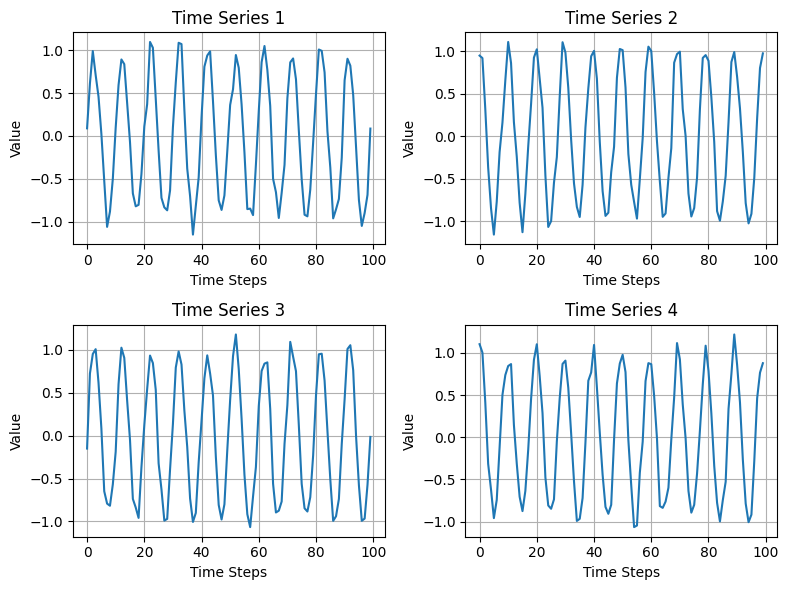

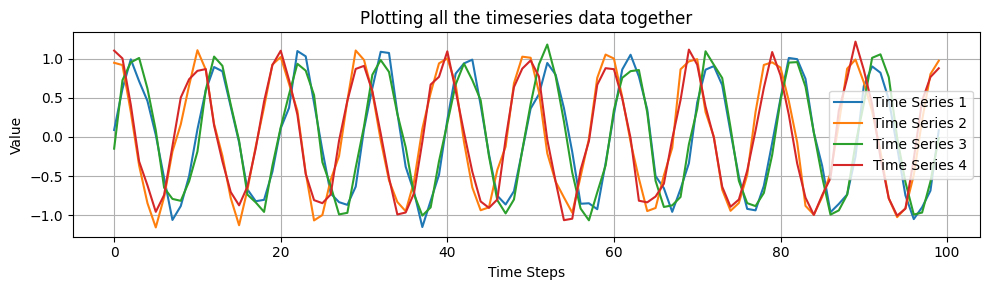

In [3]:
np.random.seed(20) #Setting a random seed to ensure that the results are reporducible

#Changable parameters
n_samples = 4
n_time_steps = 100
n_cycles = 10

#We set the timeseries generated by sine wave to cluster 1 and generated by cosine wave to cluster 2
#This is a unsupervised learning task but we generate ground truth labels to check the learning of the model
y_truth = []

def generate_time_series():
  t = np.linspace(0, 1, n_time_steps)
  series = []
  for i in range(n_samples):
    if i % 2 == 0:
      series.append(np.sin(2 * np.pi * n_cycles * t) + np.random.normal(0, 0.1, len(t)))
      y_truth.append('cluster 1')
    else :
      series.append(np.cos(2 * np.pi * n_cycles * t) + np.random.normal(0, 0.1, len(t)))
      y_truth.append('cluster 2')
  return np.array(series)

time_series_data = generate_time_series()

#Plottting code

_, ax = plt.subplots(int(n_samples/2), int(n_samples/2), figsize = (8,6))
for i in range(2):
  for j in range(2):
    ax[i, j].plot(time_series_data[i * int(n_samples/2) + j])
    ax[i, j].set_title(f'Time Series {i * int(n_samples/2) + j + 1}')
    ax[i, j].set_xlabel('Time Steps')
    ax[i, j].set_ylabel('Value')
    ax[i, j].grid()

plt.tight_layout()

plt.figure(figsize=(10, 3))
for k in range(int(n_samples)):
  plt.plot(time_series_data[k], label=f'Time Series {k + 1}')
plt.grid()
plt.title('Plotting all the timeseries data together')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()

plt.show()

###Data Analysis

We check for:<br>
- Mean of the time series.
- Max values of the time series.
- Min values of the time series.
- Standard deviation of the time series.
- Average change between timesteps.

Result:<br>
We can see a significant difference in the mean values between 2 time series when compared to the other 2.<br>
This is one data of interest.



In [5]:
max_vals = []
min_vals = []
stds = []
means = []
avg_step_chg = []

for i in range(n_samples):
  max_vals.append(max(time_series_data[i]))
  min_vals.append(min(time_series_data[i]))
  stds.append(np.std(time_series_data[i]))
  means.append(np.mean(time_series_data[i]))
  avg_step_chg.append(np.mean(np.diff(time_series_data[i])))


df = pd.DataFrame({
    'Time Series no.': range(1, n_samples + 1),
    'Max': max_vals,
    'Min': min_vals,
    'Mean': means,
    'Std': stds,
    'Avg. step change': avg_step_chg
})

df

,Time Series no.,Max,Min,Mean,Std,Avg. step change
0,1,1.096821,-1.151965,-0.005453,0.692935,-0.000026
1,2,1.107175,-1.157122,0.018669,0.722739,0.000264
2,3,1.179975,-1.066142,-0.003718,0.707425,0.001368
3,4,1.217221,-1.064368,0.024516,0.704719,-0.002275


Some plotting to visualize the critial values of the 4 timeseries.<br>
(Line plot to get a more clear understanding of which is which timeseries. Felt its much easier to read as compared to just plotting points)

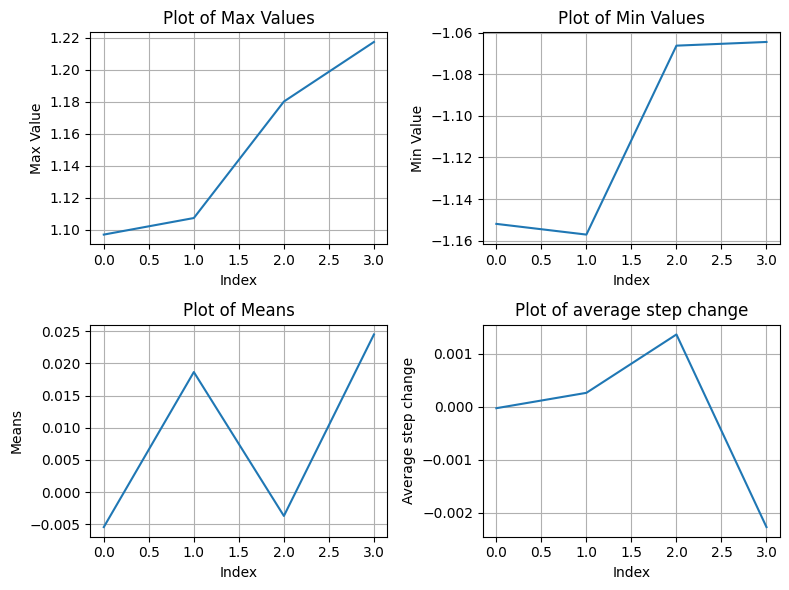

In [22]:
fig, ax = plt.subplots(2, 2, figsize = (8,6))

ax[0,0].plot(np.arange(0, len(max_vals)), max_vals)
ax[0,0].set_xlabel('Index')
ax[0,0].set_ylabel('Max Value')
ax[0,0].set_title('Plot of Max Values')
ax[0,0].grid()

ax[0,1].plot(np.arange(0, len(min_vals)), min_vals)
ax[0,1].set_xlabel('Index')
ax[0,1].set_ylabel('Min Value')
ax[0,1].set_title('Plot of Min Values')
ax[0,1].grid()

ax[1,0].plot(np.arange(0, len(means)), means)
ax[1,0].set_xlabel('Index')
ax[1,0].set_ylabel('Means')
ax[1,0].set_title('Plot of Means')
ax[1,0].grid()

ax[1,1].plot(np.arange(0, len(avg_step_chg)), avg_step_chg)
ax[1,1].set_xlabel('Index')
ax[1,1].set_ylabel('Average step change')
ax[1,1].set_title('Plot of average step change')
ax[1,1].grid()

plt.tight_layout()
plt.show()

##Preprocessing

The only preprocessing we are applying here is normalizing the data to a range of [0,1]

Checking normalization stats
Min value:  0.0
Max value:  1.0


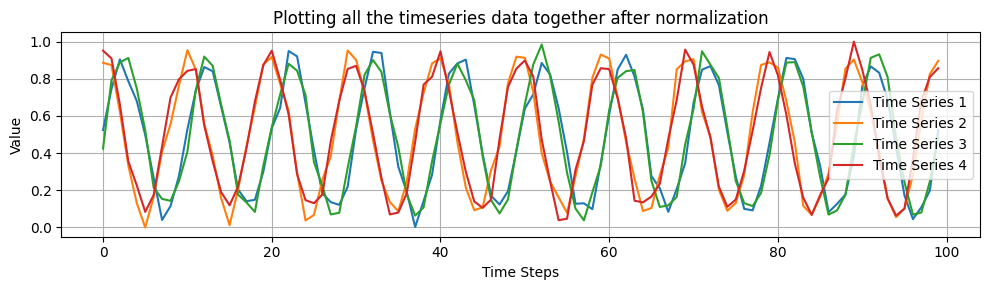

In [36]:
time_series_data = (time_series_data - np.min(time_series_data)) / (np.max(time_series_data) - np.min(time_series_data))

print("Checking normalization stats")
print("Min value: ",np.min(time_series_data))
print("Max value: ",np.max(time_series_data))

plt.figure(figsize=(10, 3))
for k in range(int(n_samples)):
  plt.plot(time_series_data[k], label=f'Time Series {k + 1}')
plt.grid()
plt.title('Plotting all the timeseries data together after normalization')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

##Unsupervised learning using kmeans from scratch

-Implementing k means just using python from scratch.<br>
-We intentionally set the 2 cluster centers to be the sine wave timeseries.<br>
-We run 3 iterations of k means to see if it learns to identify the lag and differentiate between the timeseries.<br>
-The k means algorithm should learn to time series based on lag.<br>

Result:<br>
We notice that the kmeans algoirthm has successfully learnt to differentiate between the time series and has correctly classified them.

True classification values:  ['cluster 1', 'cluster 2', 'cluster 1', 'cluster 2']
Model classification: [1, 0, 1, 0]


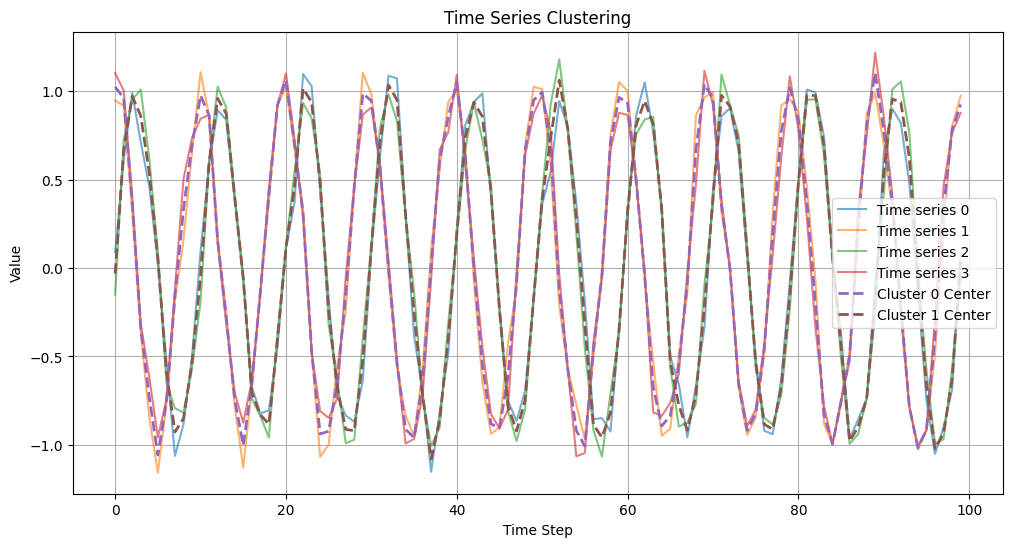

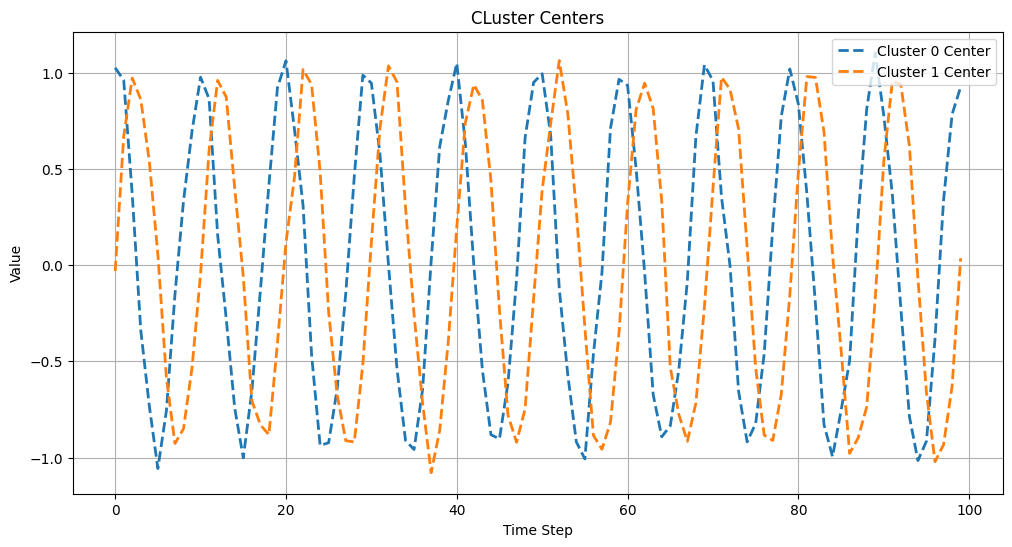

In [32]:
num_clusters = 2
num_epochs = 3

data = time_series_data
k = num_clusters #Just for maintain the convention

def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))


def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters

def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

clusters = [{'center': data[i*2], 'points': []} for i in range(0, k)]

for i in range(num_epochs):
  clusters = assign_clusters(data, clusters)
  clusters = update_clusters(data, clusters)
  pred = pred_cluster(data, clusters)


print('True classification values: ', y_truth )
print('Model classification:', pred)

def plot_clusters(X, clusters, pred):
    plt.figure(figsize=(12, 6))

    for i in range(len(X)):
        plt.plot(X[i], alpha=0.6, label=f'Time series {i}')

    for i in range(k):
        center = clusters[i]['center']
        plt.plot(center, linestyle='--', linewidth=2, label=f'Cluster {i} Center')

    plt.title('Time Series Clustering')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=(12, 6))

    for i in range(k):
        center = clusters[i]['center']
        plt.plot(center, linestyle='--', linewidth=2, label=f'Cluster {i} Center')
    plt.title('CLuster Centers')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

    plt.show()

plot_clusters(time_series_data, clusters, pred)

##Implementation using libraries for efficiency

For more efficeint computation we use libraries like sklearn and tslearn(a library built on sklearn, scipy and numpy spcifically for timeseries analysis).<br><br>

tslearn also supports advanced techniques like dynamic time wrapping(DTW) which are not supported by sklearn.<br>

Therefore, we use tslearn for implementing kmeans.<br><br>

Notes on other techniques:<br>
->Hierarchical clustering<br>
  - can also be used for this problem.<br>
  - However, it very compute intensive for large datasets. Sensitive to noise.<br>

->PCA(Principle component analysis):<br>
  - We can reduce dimensionality of data to focus only on the highly information.<br>
  - Useful when the size of the dataset increases.<br>
  - Can solve simple cases like this one using PCA and logistic regression.<br>

->Logistic regression:<br>
  - Can solve using logistic regression if the dimension of the dataset is reduced using PCA.<br>
  - If the size and complexity of the dataset is increased logistic regression won't give good results.<br>
  
->Neural networks:<br>
  - Can use neural networks for unsupervised learning and clustering. Models like autoencoders and VAC are used.<br>
  - Large datasets are usually necessary for efficient performance of neural networks.<br>

In [33]:
# !pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 8.9 MB/s eta 0:00:00


In [35]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

data_tslearn = time_series_data

model = TimeSeriesKMeans(n_clusters=2, metric="dtw", random_state=0)
labels = model.fit_predict(data_tslearn)

print('K means classification')
print('True classification values: ', y_truth )
print('Model classification:', pred)

K means classification
True classification values:  ['cluster 1', 'cluster 2', 'cluster 1', 'cluster 2']
Model classification: [1, 0, 1, 0]


###Hierarchical clustering code. Desired result achieved

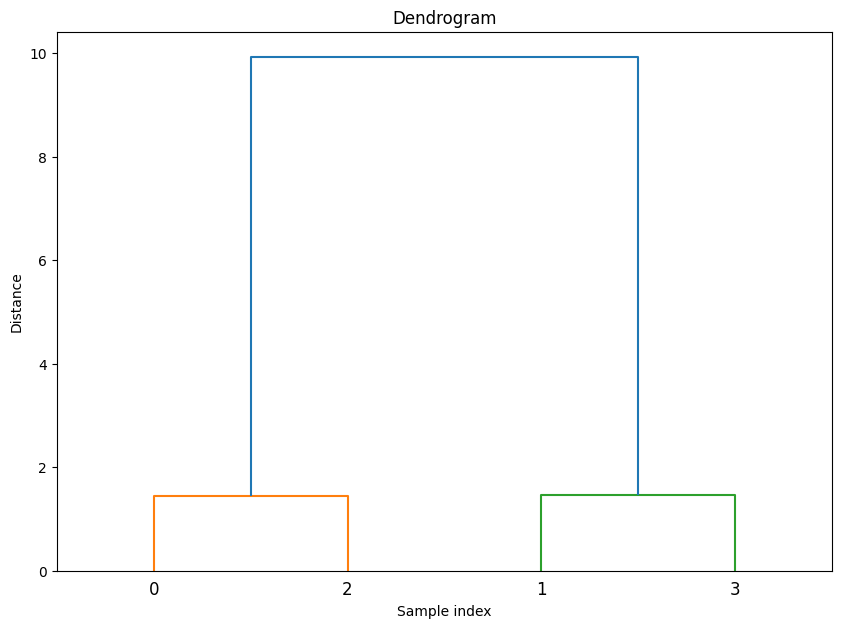

Cluster labels for the samples: [1 2 1 2]


In [30]:
import seaborn as sns
import scipy.cluster.hierarchy as sch

# We use euclidean distance and
distance_matrix = sch.distance.pdist(time_series_data, metric='euclidean')
linkage_matrix = sch.linkage(distance_matrix, method='single')
num_clusters = 2
cluster_labels = sch.fcluster(linkage_matrix, num_clusters, criterion='maxclust')

#Plotting
plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

print("Cluster labels for the samples:", cluster_labels)